In [1]:
import pandas as pd
import numpy as np

In [2]:
seed = 739

# Обработка данных

## Загрузка данных

In [3]:
train_df = pd.read_csv('data/train.csv', delimiter=',')
# cntrbtrs = pd.read_csv('data/cntrbtrs.csv', delimiter=';')
# trnsctns = pd.read_csv('data/trnsctns.csv', delimiter=';')

In [4]:
years = sorted(train_df["year"].unique())
churn_average = train_df.groupby("year")["churn"].sum().values
users_per_year = train_df.groupby("year")["churn"].count().values

График зависимости количества ушедших клиентов от года

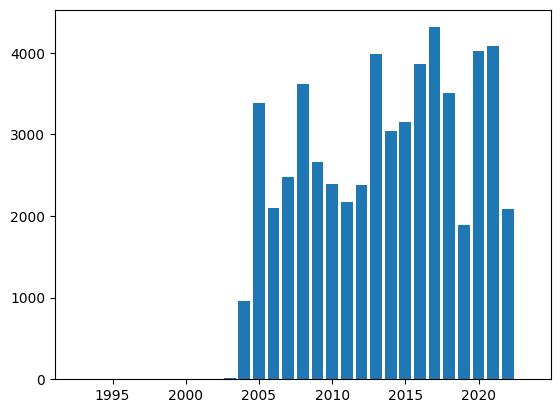

In [5]:
import matplotlib.pyplot as plt


plt.bar(x=years, height=churn_average)
plt.show()

График зависимости количества неушедших клиентов от года

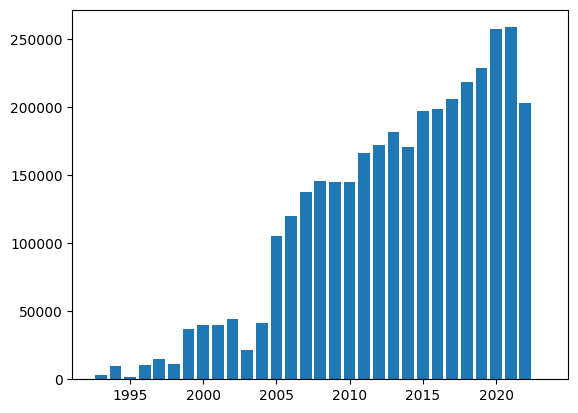

In [6]:
plt.bar(x=years, height=(users_per_year - churn_average))
plt.show()

Берем данные только с 2003 года

In [7]:
train_df = train_df.loc[train_df['year'] >= 2003]

In [8]:
train_df['year'].min()

2003

In [9]:
from IPython.display import display

display(train_df.head(7).T)
# display(trnsctns.head(7))
# display(cntrbtrs.head(7))

,0,1,2,3,4,5,6
slctn_nmbr,1,0,2,0,0,1,0
client_id,0xA095932790098744A2325A8D152C05C7,0xF75BAA20A603A2479005DEB80464336E,0x0D18081E0556AF4F95A931FBA4159D52,0x0AD72BC5475D9A4D83E12350A84F839D,0x73DF06339CC25840838408BAD52BE223,0x092BC8229C2770459A87E35C754892E0,0x4768BFF110D93941963C2379F667A77E
npo_account_id,0xD4DBBAC6561929409BA45725A220613E,0x3DCFF11974B3D8458CE3569DE9E855D5,0x9DADF88CB3407C4E89403315F640393E,0xF59C4E62F115684899EAE9B5D5ECF70F,0x35BFFA05321C014B9FC29A189E89EDF0,0x55B01C14C2640948A54F2F3A0FB715A1,0x36C2EC983556E443817033C4032D7BA8
npo_accnts_nmbr,1,2,1,1,2,1,1
pmnts_type,2,2,1,1,2,2,2
year,2017,2009,2010,2005,2007,2007,2004
quarter,2017Q4,2009Q1,2010Q1,2005Q4,2007Q4,2007Q3,2004Q4
gender,1,1,1,-1,1,-1,-1
age,48,35,47,42,42,50,29
clnt_cprtn_time_d,8091,3303,1163,47,876,3536,2031


## Просмотр данных

In [10]:
display(train_df.info())
# display(trnsctns.info())
# display(cntrbtrs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3377386 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64
 22 

None

## Обработка пропущенных данных

### Train.csv

Пустые столбцы:
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- postal_code
- region

In [7]:
train_df.loc[train_df['postal_code'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
41,1,0xD6BB7D1CE90B704084220E02EF43C0EB,0xD4A8542016584244ACD51BDB7539BBDD,1,2,2013,2013Q1,1,46,5459,...,-1,-1,-1,0.0,МАРИЙ ЭЛ РЕСП,-1,-1,0,0,0
67,1,0xD6862A5BA23B3C448914A3A1F78696E4,0x6B533E7370098441BA8F2FAAE5BB6F16,1,2,2000,2000Q4,-1,49,1321,...,-1,-1,-1,0.0,КРАСНОДАРСКИЙ КРАЙ,1,-1,0,0,0
159,1,0xCC7AA428C09DFE489587D2512A49D68D,0xEA4AB771C1CC854BB4792B85E6422F05,1,2,2020,2020Q4,-1,60,8488,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
175,1,0x69CDEA2807EACA418D8DC65A8A29869D,0x665EEE7F962E5E4BB8AB05DB270782CA,1,2,2002,2002Q2,-1,38,1651,...,-1,-1,-1,0.0,БЕЛГОРОДСКАЯ ОБЛ,-1,-1,0,0,0
225,1,0xF091AE80D5724F4EAFC9D4C63BF4B322,0xA5871F2706464444B16E97689C9D7A58,1,2,2002,2002Q2,-1,100,1739,...,-1,-1,-1,0.0,КАРЕЛИЯ РЕСП,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589600,1,0xE6FA0962E96D5744AF671BF461B3D8BA,0xFC65139425E8C34C8FC4922BEAD0AE28,1,2,2001,2001Q3,1,91,1411,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
3589686,1,0x3168199986605345AB5E5B3A5AAE4538,0xC8383D11975B7D48A43AFB98027B33C3,1,2,1999,1999Q2,1,29,351,...,-1,-1,-1,0.0,УДМУРТСКАЯ РЕСП,1,-1,0,0,0
3589694,1,0xF876749CA85E784DB1FEB631049D675D,0xBA2FAF9445C4BF4EAE03E0D5981CD208,1,2,1999,1999Q3,1,61,570,...,-1,-1,-1,0.0,ПСКОВСКАЯ ОБЛ,-1,-1,0,0,0
3589695,1,0xEDE6A8D5B10409459C5CF64D6B180B98,0xB6E4A15666A702428C48E99DD033D9BC,1,2,2012,2012Q1,1,45,5235,...,-1,-1,-1,0.0,ТОМСКАЯ ОБЛ,-1,-1,0,0,0


In [8]:
train_df.loc[(train_df['postal_code'] < 100000) & (0 < train_df['postal_code']) & train_df['region'].notna()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
8902,2,0x6046E45BF0AD144BA9FCFABB9C0047A2,0xFDC622E2D8994546B61DB7B0A3929DFC,1,2,2014,2014Q4,-1,54,2928,...,-1,-1,-1,60650.0,НИЖЕГОРОДСКАЯ ОБЛ,1,1,0,0,0
10159,1,0x78FE282A1EF165448C99B2C450C70565,0xB596A1DCD34D084C8314D3B8E4CB376B,1,2,2000,2000Q1,1,42,977,...,-1,-1,-1,42990.0,ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,1,-1,0,0,0
14102,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2014,2014Q4,1,59,2535,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0
21565,2,0x303CA3350527204990B40FD2527617D6,0xEB9B1B64C594BD449BB8EFC20A137C0F,1,2,2012,2012Q4,-1,45,2225,...,-1,-1,-1,38445.0,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС,1,1,0,0,0
29101,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2002,2002Q3,1,43,1895,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573483,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2017,2017Q4,1,58,7466,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3577420,0,0x45D8D608FD45C9469BA39AEF5AE8DA14,0x1A1E4CD44FDFE742809A3F9B6F6D676A,3,1,2022,2022Q1,1,64,1522,...,1,-1,-1,44200.0,САМАРСКАЯ ОБЛ,1,1,0,1,0
3581003,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2018,2018Q4,1,59,7831,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3588050,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2010,2010Q4,1,55,1074,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0


Вычислим регионы по почтовым индексам

In [41]:
buffer = train_df.loc[train_df['region'].notna() & train_df['postal_code'].notna() & train_df['postal_code'] > 0]
dict_ = {str(code)[-3:]: region for (region, code) in zip(buffer['region'], buffer['postal_code'])}

buffer = train_df.loc[train_df['region'].isna() & train_df['postal_code'].notna()]

In [42]:
dict_["0"] = np.NAN
list_ = []

for i, row in buffer.iterrows():
    code = str(row['postal_code'])[-3:]
    list_.append(dict_[code])

train_df.loc[train_df.loc[:, 'region'].isna() & train_df.loc[:, 'postal_code'].notna(), 'region'] = pd.Series(list_)

In [43]:
train_df.loc[train_df['region'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn


Проверяем пустые строки

In [44]:
for col in train_df.columns:
    if len(train_df.loc[train_df[col].isna()]) != 0:
        print(col, len(train_df.loc[train_df[col].isna()]))

frst_pmnt_date 32435
lst_pmnt_date_per_qrtr 964876
postal_code 99488


In [39]:
train_df['region'].fillna('Неизвестен', inplace=True)

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_53803/736859608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['region'].fillna('Неизвестен', inplace=True)


### Удаляем лишние столбцы
- slctn_nmbr
- client_id
- npo_account_id
- year
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- pmnts_sum_per_year
- pmnts_nmbr_per_year
- incm_per_year
- phone_number
- email
- postal_code

In [47]:
train_df.drop(columns=[
    'postal_code',
    'slctn_nmbr',
    'client_id',
    'npo_account_id',
    'year',
    'frst_pmnt_date',
    'lst_pmnt_date_per_qrtr'
], inplace=True)

In [48]:
len(train_df.columns.to_list())

35

## Графики

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Берем столбцы по типу данных

In [50]:
int_cols = train_df.select_dtypes(int).columns.to_list()
float_cols = train_df.select_dtypes(float).columns.to_list()
cat_cols = train_df.select_dtypes(object).columns.to_list()
display(int_cols, float_cols, cat_cols)

['npo_accnts_nmbr',
 'pmnts_type',
 'gender',
 'age',
 'clnt_cprtn_time_d',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'pmnts_nmbr',
 'pmnts_nmbr_per_qrtr',
 'pmnts_nmbr_per_year',
 'phone_number',
 'email',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt',
 'churn']

['balance',
 'oprtn_sum_per_qrtr',
 'oprtn_sum_per_year',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_sum_per_qrtr',
 'pmnts_sum_per_year',
 'incm_sum',
 'incm_per_qrtr',
 'incm_per_year',
 'mgd_accum_period',
 'mgd_payment_period']

['quarter', 'region']

Убираем выбросы

In [152]:
def selection_data(df: pd.DataFrame, cols: list[str], n=1.5):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_min = q1 - n * iqr
        lim_max = q3 + n * iqr
        
        df = df.loc[(df[col] >= lim_min) & (df[col] <= lim_max)]
    return df


buffer = train_df.copy()
buffer = selection_data(buffer, ['balance', 'oprtn_sum_per_qrtr',
                                 'frst_pmnt', 'lst_pmnt',
                                 'pmnts_sum', 'pmnts_sum_per_qrtr',
                                 'incm_sum', 'incm_per_qrtr',
                                 'pmnts_sum_per_year',
                                 'oprtn_sum_per_year', 'incm_per_year',
                                 'age'])
len(buffer), len(train_df)

(1008745, 3377386)

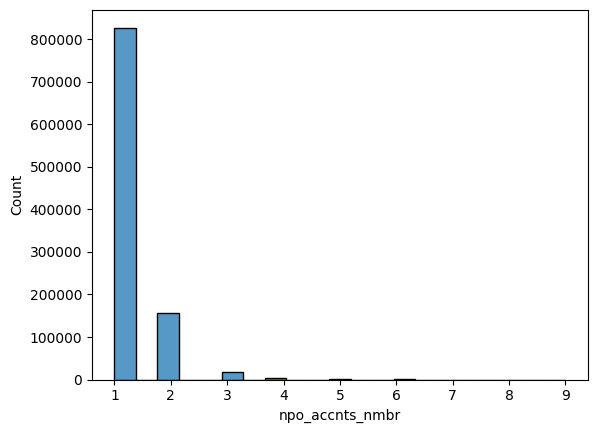

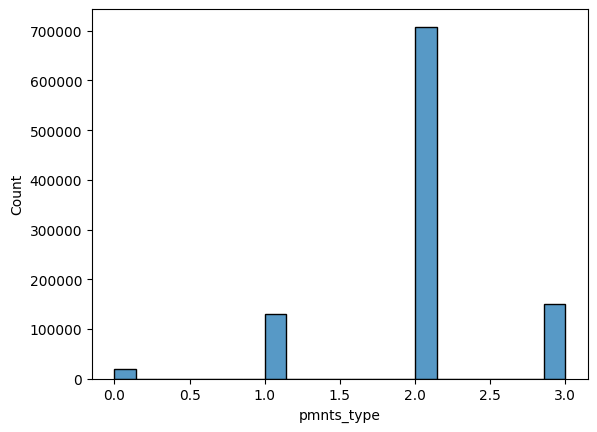

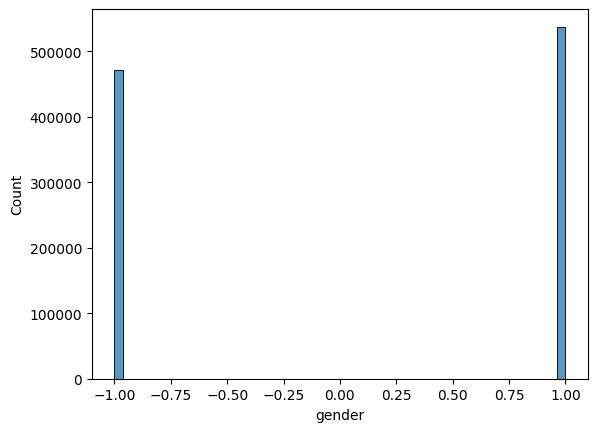

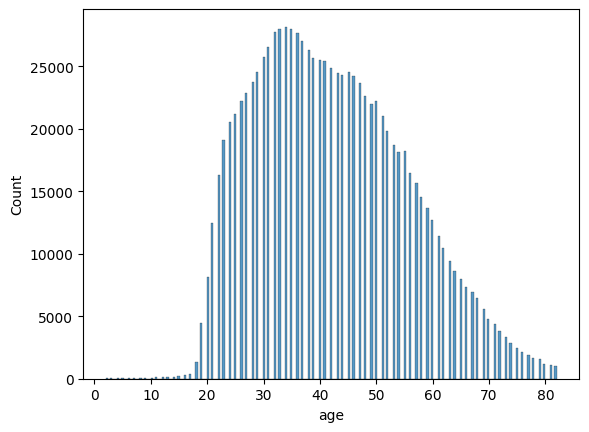

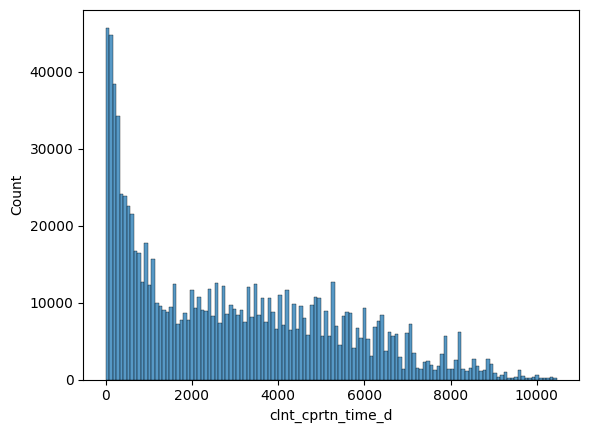

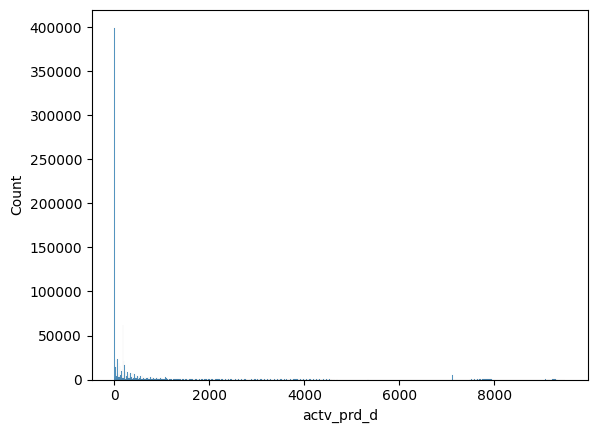

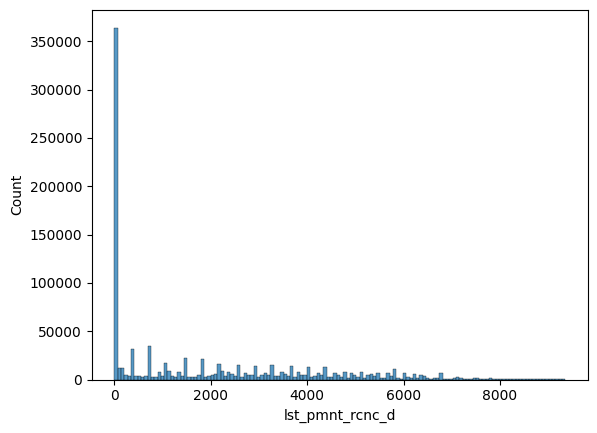

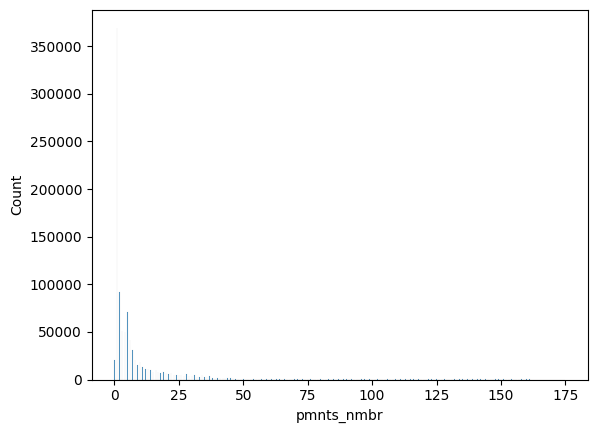

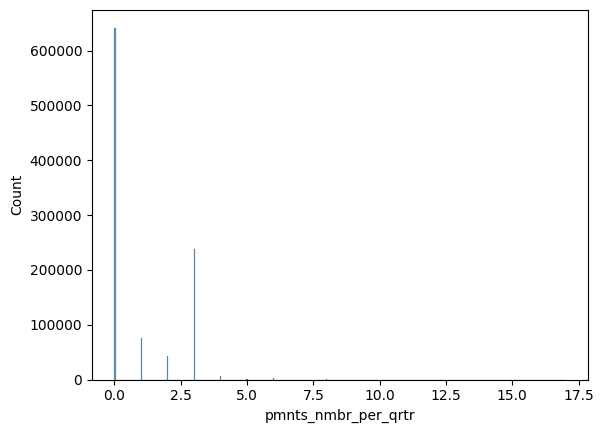

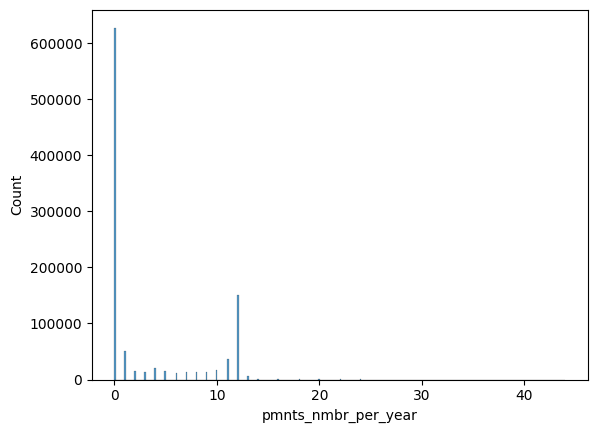

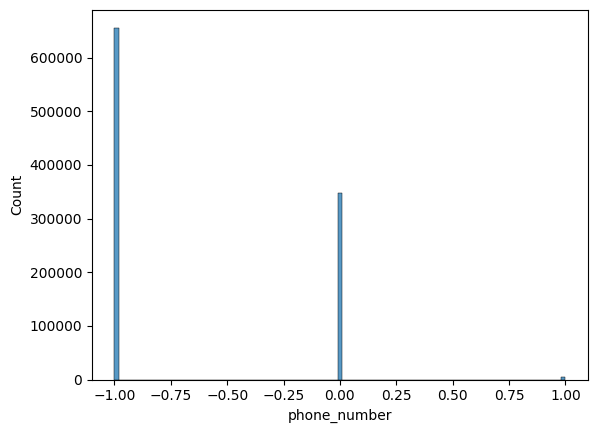

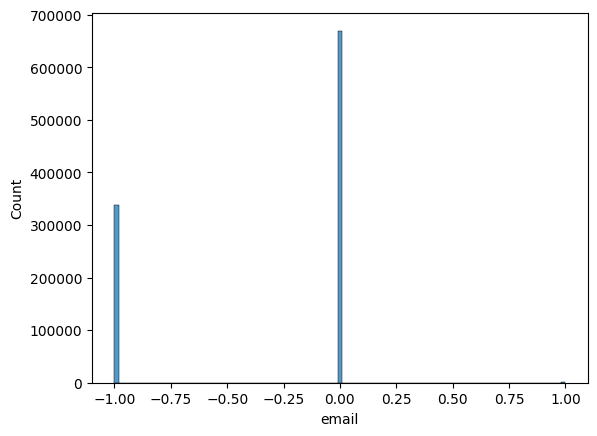

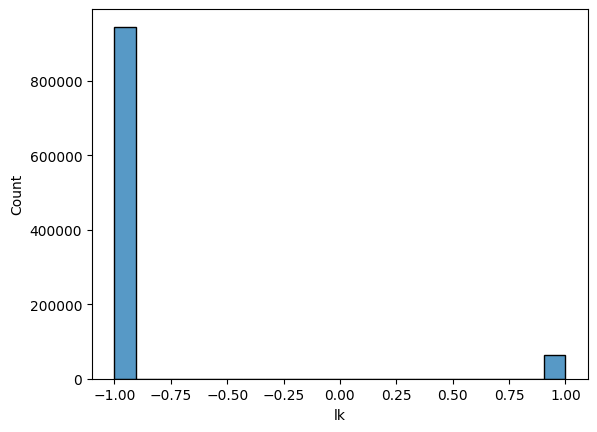

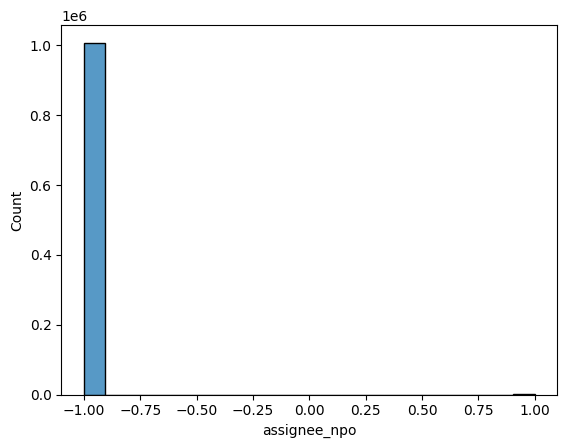

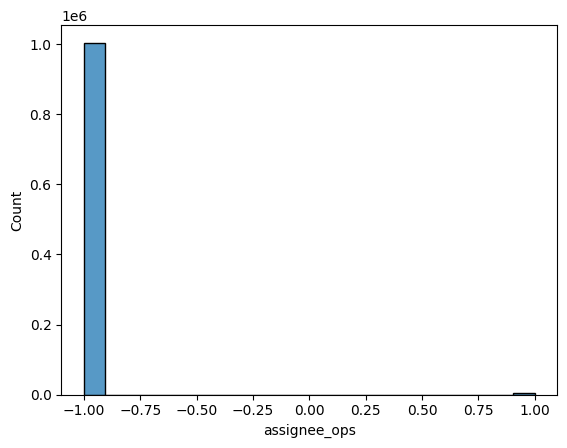

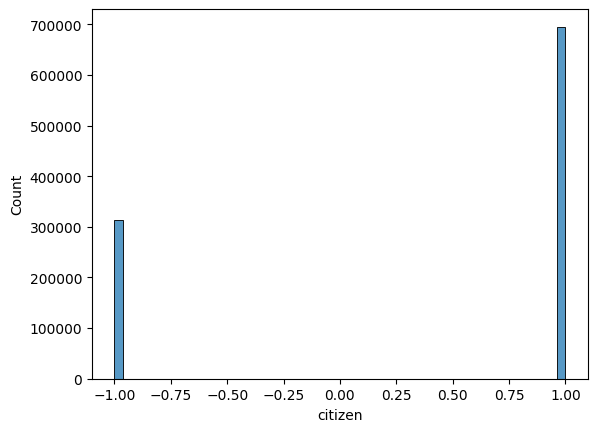

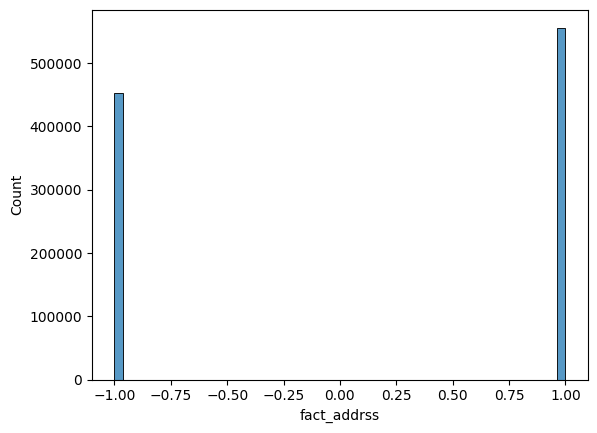

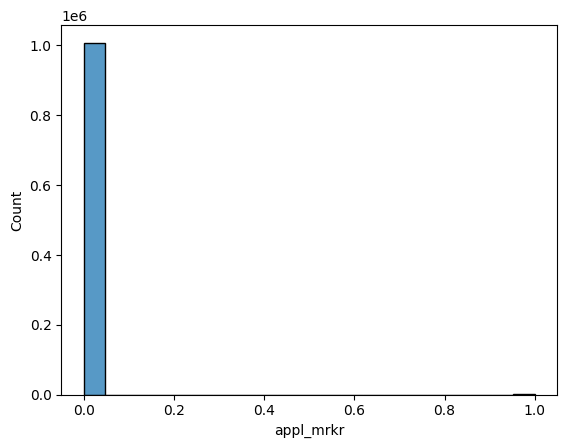

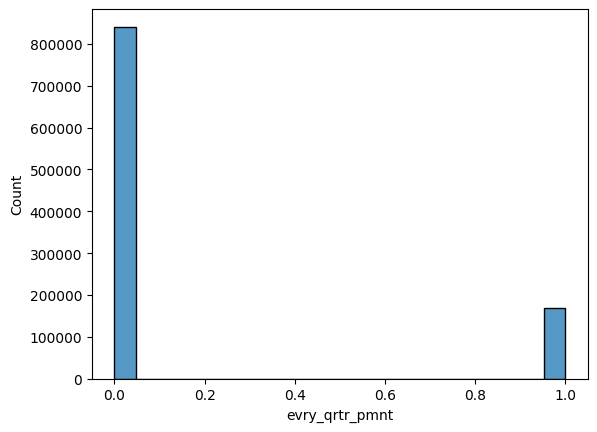

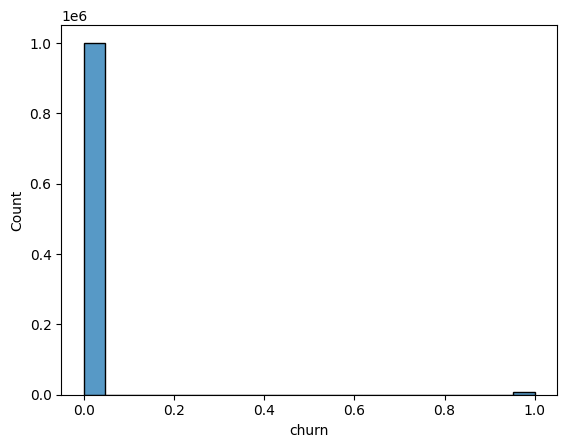

In [153]:
for col in int_cols:
    sns.histplot(buffer[col])
    plt.show()

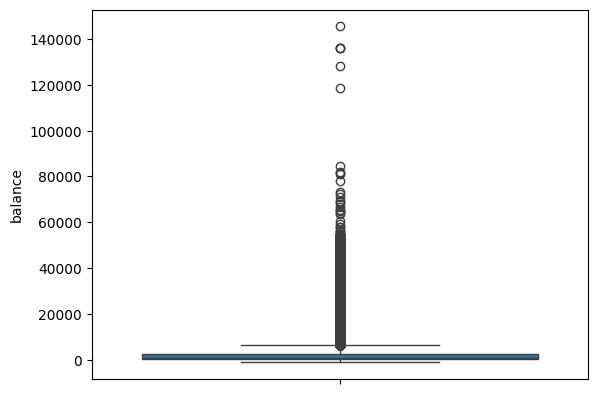

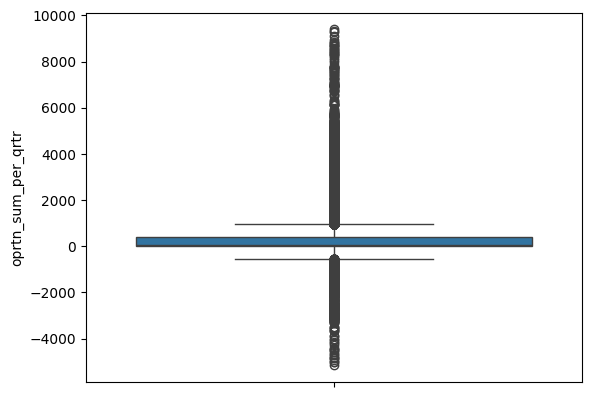

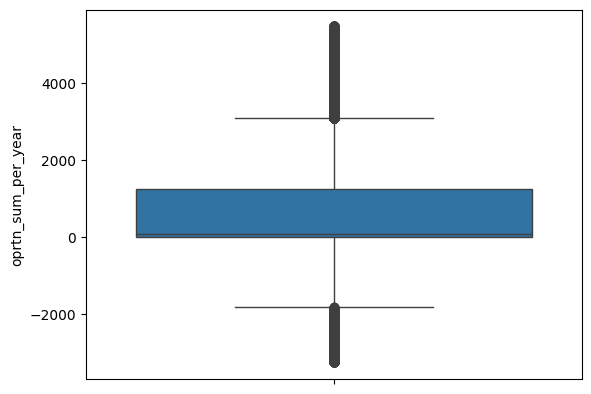

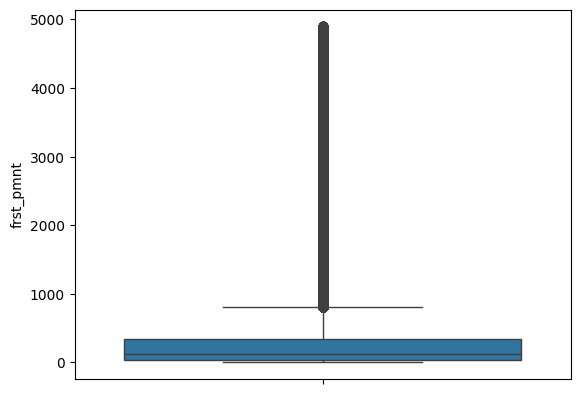

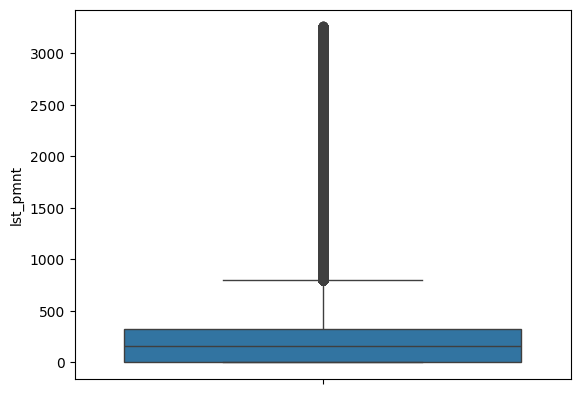

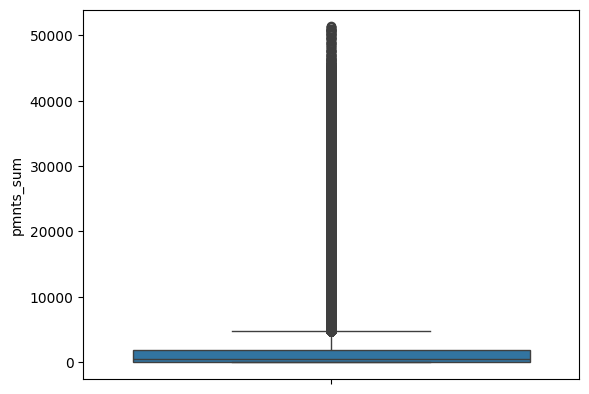

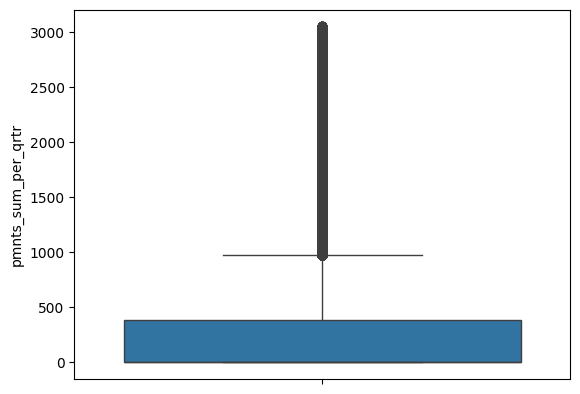

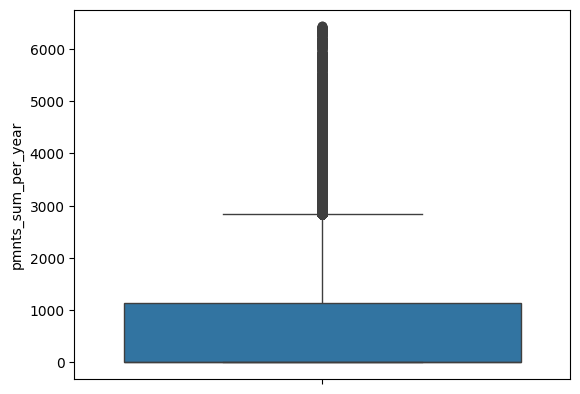

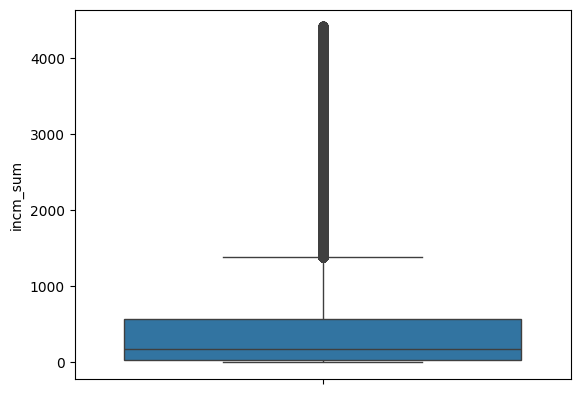

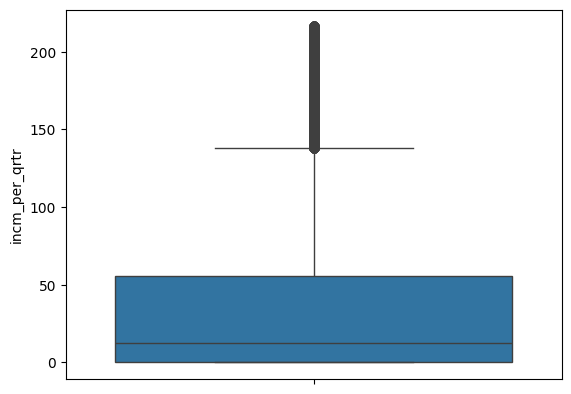

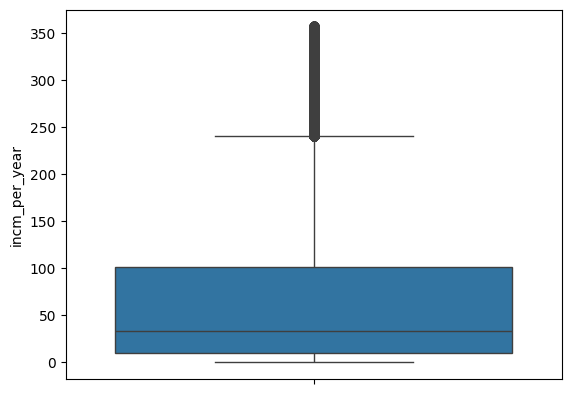

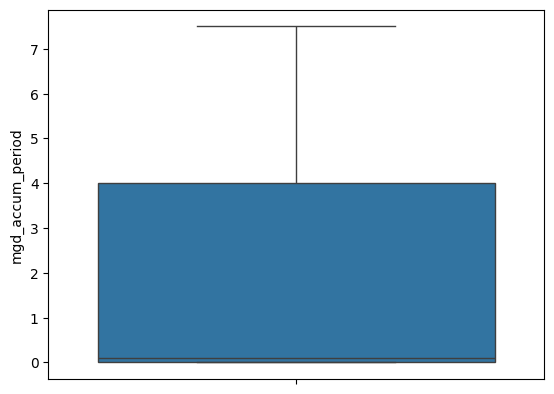

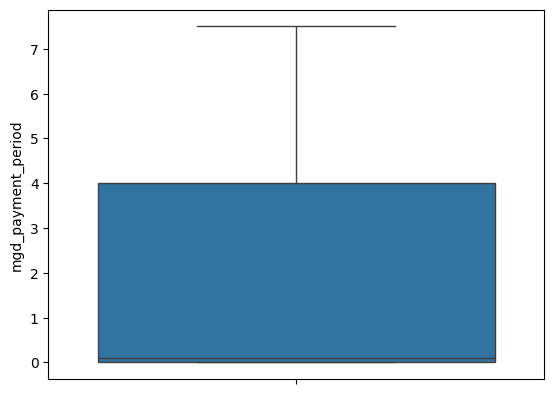

In [154]:
for col in float_cols:
    sns.boxplot(buffer[col])
    plt.show()

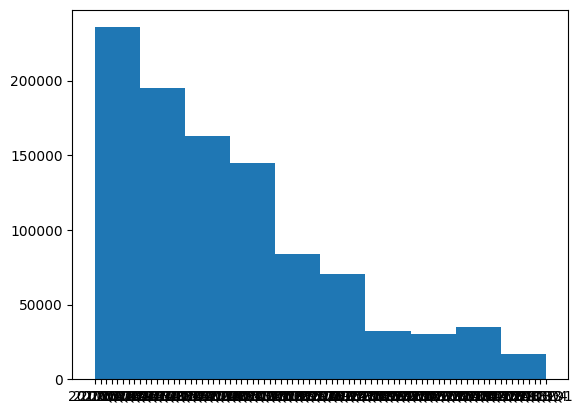

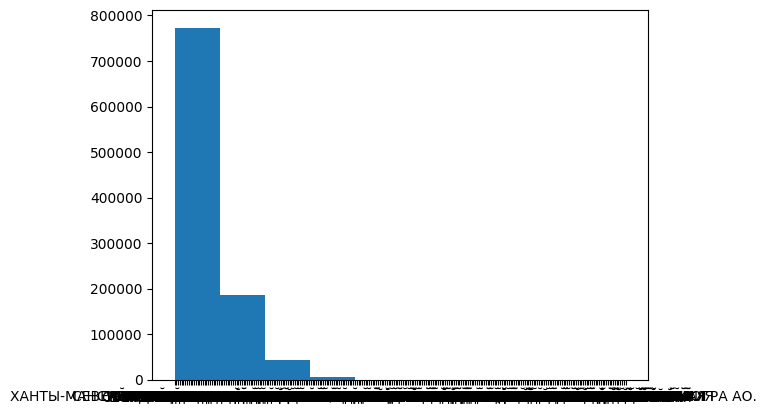

In [155]:
for col in cat_cols:
    plt.hist(buffer[col])
    plt.show()

Матрица корреляции

<Axes: >

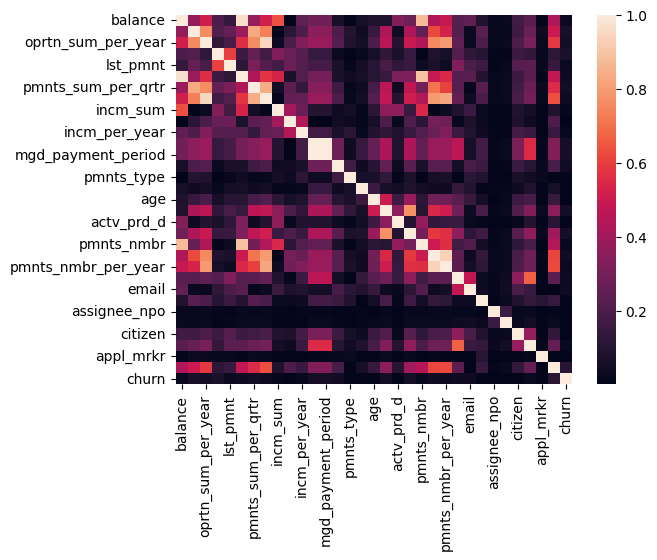

In [156]:
sns.heatmap(np.abs(buffer[float_cols + int_cols].corr()))

## Преобразование данных

In [157]:
from sklearn.base import BaseEstimator, TransformerMixin

class IntegerFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, df: pd.DataFrame, y: None = None) -> BaseEstimator:
        self.dataframe = df
        # self.dataframe['actv_prd_d'] = (self.dataframe['actv_prd_d'] - self.dataframe['actv_prd_d'].mean()) / self.dataframe['actv_prd_d'].std()
        # self.dataframe['lst_pmnt_rcnc_d'] = (self.dataframe['lst_pmnt_rcnc_d'] - self.dataframe['lst_pmnt_rcnc_d'].mean()) / self.dataframe['lst_pmnt_rcnc_d'].std()
        self.dataframe['gender'] = self.dataframe['gender'].replace([1, -1], [1, 0])
        self.dataframe['has_communication'] = (self.dataframe['email'] == 1) | (self.dataframe['phone_number'] == 1)
        self.dataframe.drop(columns=['email', 'phone_number'], inplace=True)
        
        return self
    
    def transform(self, X: None = None) -> pd.DataFrame:
        return self.dataframe
    

trans = IntegerFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer).head(5)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,...,lk,assignee_npo,assignee_ops,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,has_communication
0,1,2,2017Q4,1,48,8091,0,6757,679.37,31.34,...,-1,-1,-1,САМАРСКАЯ ОБЛ,-1,-1,0,0,0,False
2,1,1,2010Q1,1,47,1163,1121,34,5569.85,463.41,...,-1,-1,-1,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,False
3,1,1,2005Q4,0,42,47,0,0,81.37,81.37,...,-1,-1,-1,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,0,False
4,2,2,2007Q4,1,42,876,853,30,6937.65,794.36,...,-1,-1,-1,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0,False
9,2,1,2007Q3,0,25,175,153,28,1017.85,343.96,...,-1,-1,-1,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0,False


In [158]:
from sklearn.preprocessing import LabelEncoder


class CatFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, X: pd.DataFrame) -> BaseEstimator:
        self.dataframe = X
        self.dataframe['quarter'] = self.dataframe['quarter'].replace(r'\d{4}Q', '', regex=True)
        scaler1 = LabelEncoder().fit(self.dataframe['region'])
        self.dataframe['region'] = scaler1.transform(self.dataframe['region'])
        return self
    
    def transform(self, X: None = None) -> np.ndarray:
        return self.dataframe


trans = CatFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer)['quarter'].unique()

array(['4', '1', '3', '2'], dtype=object)

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


offices = ["МОСКВА Г", "САНКТ-ПЕТЕРБУРГ Г", "ВОЛОГОДСКАЯ ОБЛ", "ОРЛОВСКАЯ ОБЛ", "ЛИПЕЦКАЯ ОБЛ", "РОСТОВСКАЯ ОБЛ", "НИЖЕГОРОДСКАЯ ОБЛ", "ПЕРМСКИЙ КРАЙ", "ЕКАТЕРИНБУРГ Г", "ЧЕЛЯБИНСК Г", "НОВОСИБИРСК Г", "ИРКУТСКАЯ ОБЛ"]
buffer['has_close_office'] = buffer['region'].copy()
buffer['has_close_office'] = buffer['has_close_office'].apply(lambda x: x in offices)

transformer = ColumnTransformer(
    transformers=(
        ('int_trans', IntegerFeaturesTransformer(), int_cols),
        ('cat_trans', CatFeaturesTransformer(), cat_cols),
        # ('ohe', OneHotEncoder(), ['quarter']),
    )
)
transformer.fit(buffer.copy())

X, y = transformer.transform(buffer).astype(np.float32), buffer['churn'].to_numpy(dtype=np.int16)

In [160]:
X.shape, y.shape

((1008745, 21), (1008745,))

# Кросс-валидация моделей

In [161]:
len(train_df.loc[train_df['churn'] == 1]) / len(train_df)

0.016606926184925264

In [162]:
np.count_nonzero(y) / (y.size)

0.007880088624974597

In [163]:
from sklearn.model_selection import train_test_split, LearningCurveDisplay
from sklearn.metrics import f1_score, RocCurveDisplay, precision_score, recall_score, ConfusionMatrixDisplay


def validate(model: BaseEstimator) -> pd.DataFrame:
    dict_ = {
        'metric': [],
        'score': []
    }
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=seed)
    LearningCurveDisplay.from_estimator(model, X=X_train, y=y_train)
    plt.show()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    for metric in (f1_score, precision_score, recall_score):
        dict_['metric'].append(metric.__name__)
        dict_['score'].append(metric(y_test, y_pred))
        
    RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
        
    return pd.DataFrame(dict_)

In [164]:
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

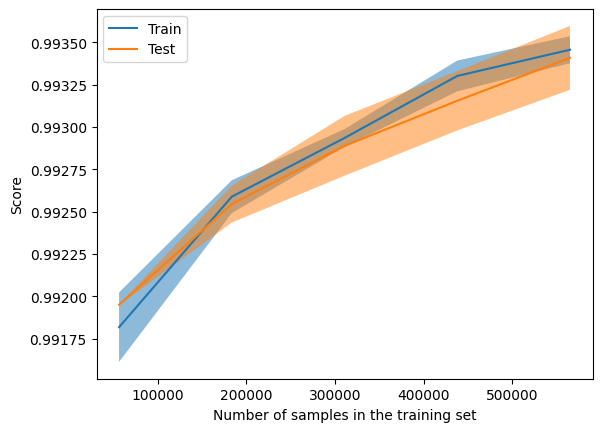

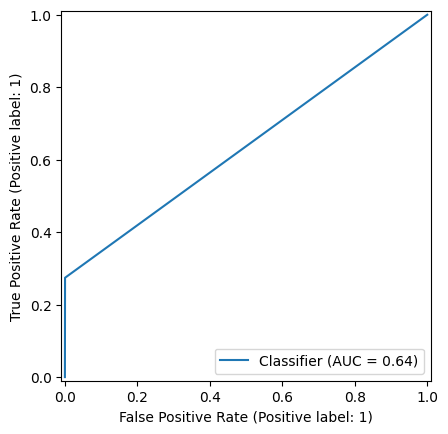

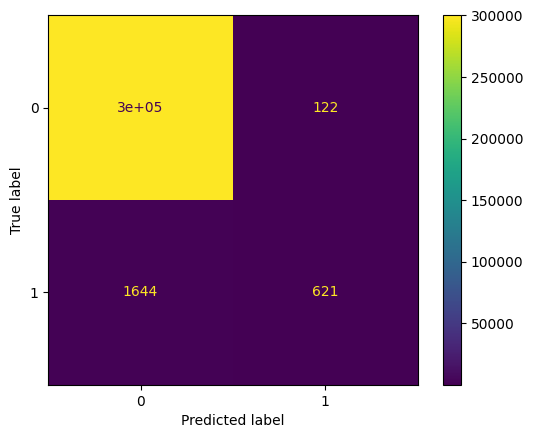

,metric,score
0,f1_score,0.412899
1,precision_score,0.835801
2,recall_score,0.274172


In [178]:
validate(HistGradientBoostingClassifier(random_state=seed, min_samples_leaf=7000, max_iter=50))

Learning rate set to 0.222782
0:	learn: 0.0842642	total: 147ms	remaining: 2m 27s
1:	learn: 0.0110079	total: 215ms	remaining: 1m 47s
2:	learn: 0.0020203	total: 290ms	remaining: 1m 36s
3:	learn: 0.0005202	total: 367ms	remaining: 1m 31s
4:	learn: 0.0001947	total: 437ms	remaining: 1m 27s
5:	learn: 0.0000950	total: 576ms	remaining: 1m 35s
6:	learn: 0.0000501	total: 653ms	remaining: 1m 32s
7:	learn: 0.0000311	total: 732ms	remaining: 1m 30s
8:	learn: 0.0000221	total: 810ms	remaining: 1m 29s
9:	learn: 0.0000149	total: 885ms	remaining: 1m 27s
10:	learn: 0.0000126	total: 957ms	remaining: 1m 26s
11:	learn: 0.0000109	total: 1.03s	remaining: 1m 24s
12:	learn: 0.0000086	total: 1.09s	remaining: 1m 23s
13:	learn: 0.0000076	total: 1.17s	remaining: 1m 22s
14:	learn: 0.0000075	total: 1.24s	remaining: 1m 21s
15:	learn: 0.0000066	total: 1.31s	remaining: 1m 20s
16:	learn: 0.0000066	total: 1.38s	remaining: 1m 19s
17:	learn: 0.0000066	total: 1.44s	remaining: 1m 18s
18:	learn: 0.0000066	total: 1.5s	remaining: 

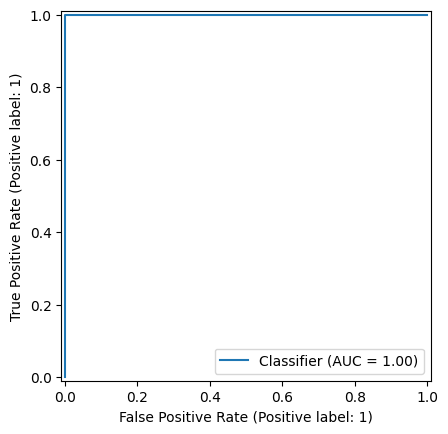

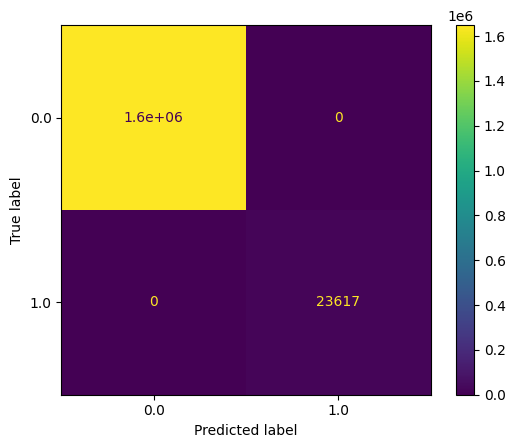

,metric,score
0,f1_score,1.0
1,precision_score,1.0
2,recall_score,1.0


In [62]:
validate(CatBoostClassifier(random_state=seed))

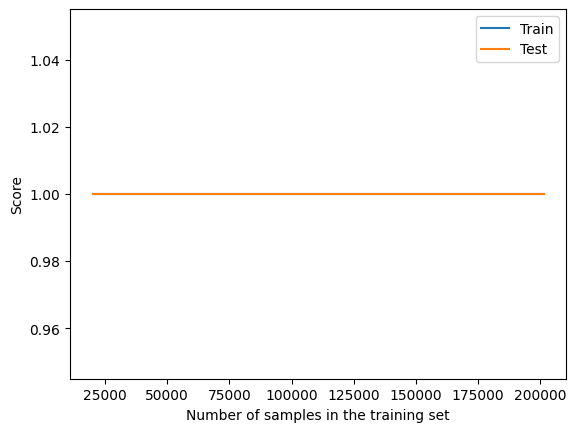

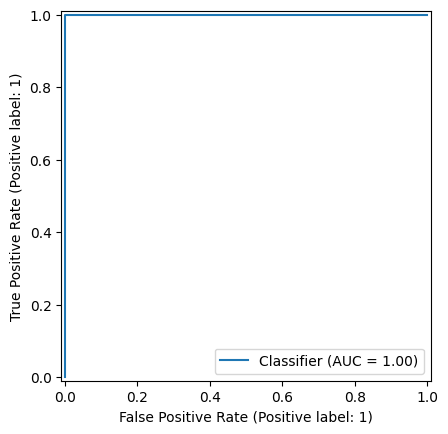

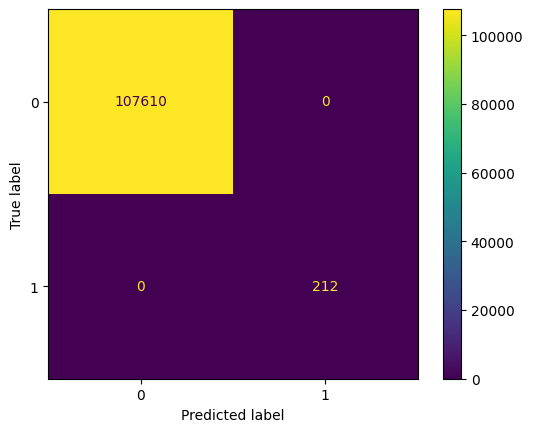

,metric,score
0,f1_score,1.0
1,precision_score,1.0
2,recall_score,1.0


In [146]:
validate(XGBClassifier(random_state=seed, n_estimators=))

# Voting ансамбль

In [22]:
estimators = [
    ('hist', HistGradientBoostingClassifier(random_state=seed)),
    ('xgb', XGBClassifier(random_state=seed)),
    ('cat', CatBoostClassifier(random_state=seed))
]

In [23]:
from sklearn.ensemble import VotingClassifier


clf = VotingClassifier(estimators=estimators,
                       n_jobs=-1,
                       voting='soft')
clf

VotingClassifier(estimators=[('hist',
                              HistGradientBoostingClassifier(random_state=739)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            imp...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=739, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x30c9c6b10>)],
                 n_jobs=-1, voting='soft')

Обучение и тестирование ансамбля

In [24]:
from sklearn.model_selection import KFold


scores = np.zeros(5)
cv = KFold(5)
for fold, (train, test) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    clf.fit(X_train, y_train)
    
    scores[fold] = f1_score(y_test, clf.predict(X_test))
    print(f'Fold: {fold + 1}, F1 score: {scores[fold]:.5f}')

print(scores, scores.mean())

Learning rate set to 0.222782
0:	learn: 0.0842672	total: 191ms	remaining: 3m 11s
1:	learn: 0.0109806	total: 295ms	remaining: 2m 27s
2:	learn: 0.0020119	total: 389ms	remaining: 2m 9s
3:	learn: 0.0005156	total: 484ms	remaining: 2m
4:	learn: 0.0001935	total: 577ms	remaining: 1m 54s
5:	learn: 0.0000949	total: 669ms	remaining: 1m 50s
6:	learn: 0.0000496	total: 774ms	remaining: 1m 49s
7:	learn: 0.0000307	total: 870ms	remaining: 1m 47s
8:	learn: 0.0000215	total: 965ms	remaining: 1m 46s
9:	learn: 0.0000152	total: 1.06s	remaining: 1m 44s
10:	learn: 0.0000127	total: 1.16s	remaining: 1m 44s
11:	learn: 0.0000097	total: 1.34s	remaining: 1m 50s
12:	learn: 0.0000079	total: 1.44s	remaining: 1m 49s
13:	learn: 0.0000079	total: 1.53s	remaining: 1m 48s
14:	learn: 0.0000079	total: 1.62s	remaining: 1m 46s
15:	learn: 0.0000079	total: 1.71s	remaining: 1m 45s
16:	learn: 0.0000079	total: 1.79s	remaining: 1m 43s
17:	learn: 0.0000079	total: 1.88s	remaining: 1m 42s
18:	learn: 0.0000079	total: 1.96s	remaining: 1m 4

Метрики ансамбля

Calculation time on 1672049 samples: 1.785 s


,metric,score
0,f1_score,1.0
1,precision_score,1.0
2,recall_score,1.0


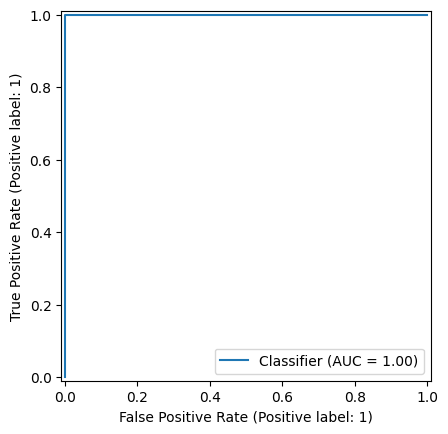

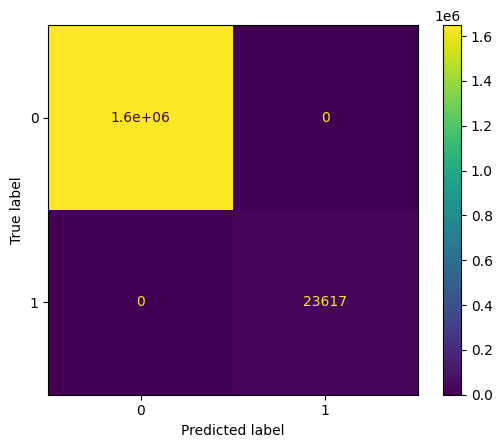

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score
from time import time


metrics = [
    f1_score,
    precision_score,
    recall_score
]

start_time = time()
y_pred = clf.predict(X)
print(f'Calculation time on {y.size} samples: {(time() - start_time):.3f} s')

RocCurveDisplay.from_predictions(y, y_pred)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
pd.DataFrame({
    'metric': [metric.__name__ for metric in metrics],
    'score': [metric(y, y_pred) for metric in metrics]
})

Сравнение предсказанных данных и реальных данных

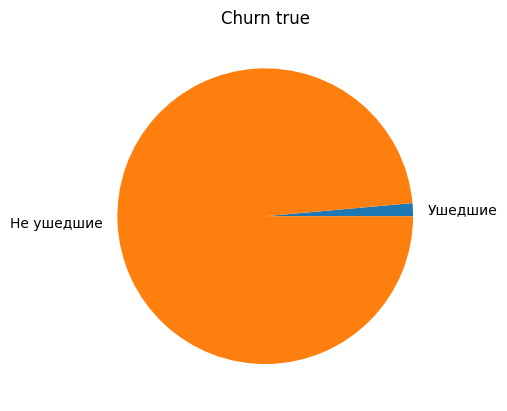

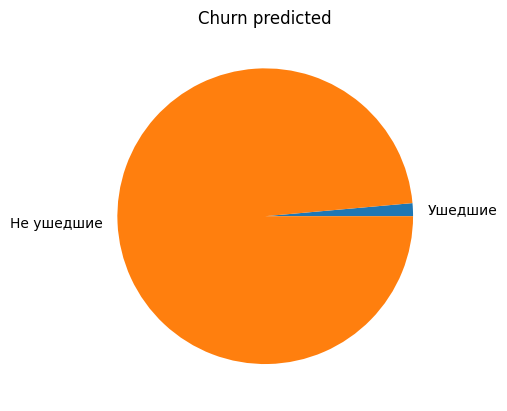

In [28]:
labels = ['Ушедшие', 'Не ушедшие']

data = [np.count_nonzero(y), y.size - np.count_nonzero(y)]
plt.pie(data, labels=labels)
plt.title('Churn true')
plt.show()

data = [np.count_nonzero(y_pred), y_pred.size - np.count_nonzero(y_pred)]
plt.pie(data, labels=labels)
plt.title('Churn predicted')
plt.show()